In [3]:
import pandas as pd              # data handling
import matplotlib.pyplot as plt  # plotting charts
import seaborn as sns            # better styled plots
from datetime import datetime    # date conversion


In [6]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
df = df.dropna()


In [13]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [16]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [20]:
df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)

In [21]:
df.describe()


,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


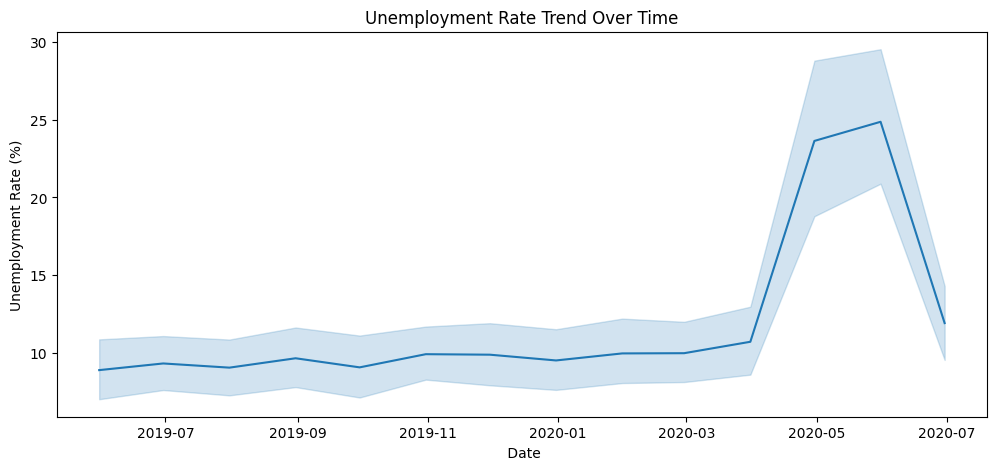

In [26]:
plt.figure(figsize=(12,5))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df)
plt.title("Unemployment Rate Trend Over Time")
plt.xlabel(" Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


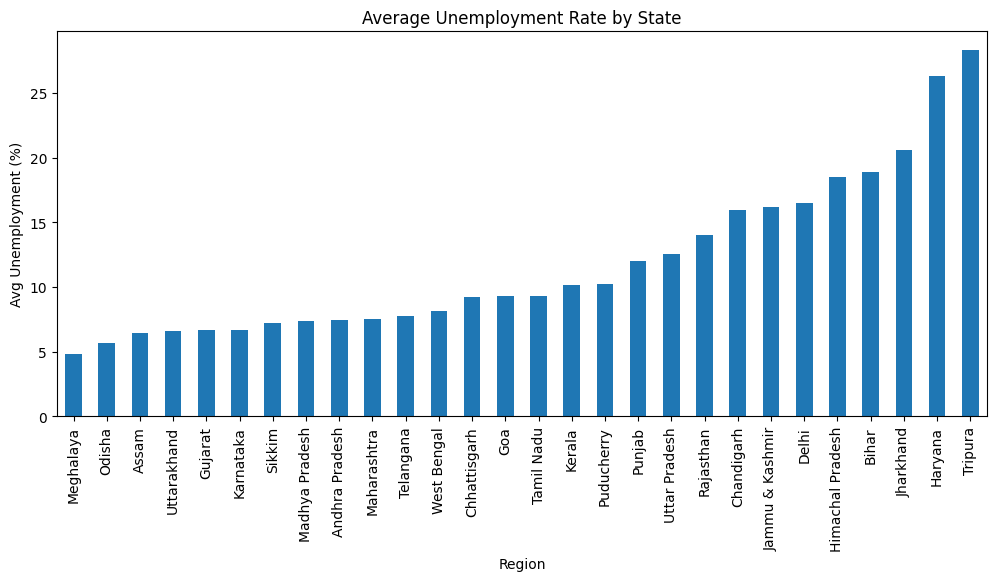

In [29]:
state_group = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()
state_group.plot(kind='bar', figsize=(12,5))
plt.title("Average Unemployment Rate by State")
plt.ylabel("Avg Unemployment (%)")
plt.show()


In [30]:
covid_start = pd.to_datetime("2020-03-01")
before_covid = df[df[' Date'] < covid_start]
after_covid = df[df[' Date'] >= covid_start]

print("Before COVID Avg:",
      before_covid[' Estimated Unemployment Rate (%)'].mean())
print("During/After COVID Avg:",
      after_covid[' Estimated Unemployment Rate (%)'].mean())


Before COVID Avg: 9.509533582089553
During/After COVID Avg: 17.774362745098042


✔ Insight 1: Covid impact

The unemployment rate increased sharply during the Covid-19 lockdown period, indicating large-scale job losses due to economic shutdown.

✔ Insight 2: Recovery trend

After the lockdown period, unemployment rates gradually declined, showing partial recovery as economic activities resumed.

✔ Insight 3: Policy implication

The analysis highlights the need for employment support programs and social security measures during economic crises to protect vulnerable workers.